In [10]:
%load_ext autoreload
%autoreload 2

from chemprop.featurizers import MultiHotAtomFeaturizer, MultiHotBondFeaturizer
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
IPythonConsole.drawOptions.addAtomIndices=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
'''
How featurize atoms ?
How featurize bonds ?
How generate adj mat I want ?
'''

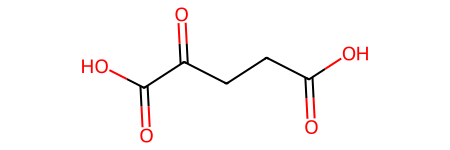

In [3]:
# Test mol

smi = "O=C(O)CCC(=O)C(=O)O"
mol = Chem.MolFromSmiles(smi)
mol

In [72]:
atom = mol.GetAtomWithIdx(0)

In [20]:
from src.utils import load_known_rxns

krs = load_known_rxns("./data/sprhea/known_rxns_240310_v2_folded_protein_transcript.json")

In [76]:
from src.featurizer import MultiHotAtomFeaturizer as af
from src.featurizer import RCVNReactionMolGraphFeaturizer, MultiHotBondFeaturizer

In [48]:
rxn = krs['R1d95836fd0157c53adafa3db9fda628f0960c7cfb4d4166dda1d7f8a3aa78e8d']

In [49]:
atom_featurizer = af.no_stereo()
atom_featurizer(atom), len(atom_featurizer(atom))

(array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        1.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 1.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        1.     , 0.     , 1.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 1.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.15999]),
 67)

In [45]:
feat_dict = {
            'atomic_nums': lambda a : a.GetAtomicNum(),
            'degrees': lambda a: a.GetTotalDegree(),
            'formal_charges': lambda a: a.GetFormalCharge(),
            'num_Hs': lambda a: int(a.GetTotalNumHs()),
            'hybridizations': lambda a: a.GetHybridization(),
            'atom_map_nums': lambda a : a.GetAtomMapNum(),
            'chiral_tags': lambda a: int(a.GetChiralTag()),
        }
[(k,v(atom)) for k,v in feat_dict.items()]

[('atomic_nums', 8),
 ('degrees', 1),
 ('formal_charges', 0),
 ('num_Hs', 0),
 ('hybridizations', rdkit.Chem.rdchem.HybridizationType.SP2),
 ('atom_map_nums', 0),
 ('chiral_tags', 0)]

In [53]:
bond = mol.GetBondBetweenAtoms(0, 1)
bond_featurizer = MultiHotBondFeaturizer()
bond_featurizer(bond)

array([0, 0, 1, 0, 0, 1, 0])

In [92]:
from src.featurizer import RCVNReactionMolGraphFeaturizer
rxn_featurizer = RCVNReactionMolGraphFeaturizer(
    atom_featurizer=af.no_stereo(),
    bond_featurizer=MultiHotBondFeaturizer()
)
mg = rxn_featurizer(rxn)

In [93]:
mg.edge_index[:,-2:]

array([[66, 76],
       [76, 66]])

In [95]:
mg.V[-1, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
mg.E.shape, mg.rev_edge_index.shape, mg.V.shape

((144, 7), (144,), (77, 67))